In [45]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
import os
import urllib

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import make_regression
from sklearn.datasets import make_classification

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
# sns.set_style( 'white' )

In [87]:
url = "https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/fruit_data_with_colors.txt"
data_path = "data/fruit/"
file_name = "fruit_data_with_colors.txt"

In [74]:
def downloadDataset(url, directory, file_name):
    if not os.path.exists(directory):
        os.makedirs(directory)
    urllib.urlretrieve(url, directory + file_name)

In [4]:
downloadDataset(url, data_path, file_name)

In [75]:
fruits = pd.read_table(data_path + file_name)
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [76]:
fruit_features = [col for i, col in enumerate(fruits.columns) if i > 2]
fruits_x = fruits[fruit_features]
fruit_names = fruits.fruit_name.unique()
fruits_y = fruits.fruit_label

In [77]:
train_x, test_x, train_y, test_y = train_test_split(fruits_x, fruits_y, random_state = 0)

In [78]:
training_accuracy = []
testing_accuracy = []
k_neighbor_setting = range(1, 11)
print(k_neighbor_setting)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [79]:
for neighbor in k_neighbor_setting:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(train_x, train_y)
    
    train_acc = knn.score(train_x, train_y)
    training_accuracy.append(train_acc)
    
    test_acc = knn.score(test_x, test_y)
    testing_accuracy.append(test_acc)

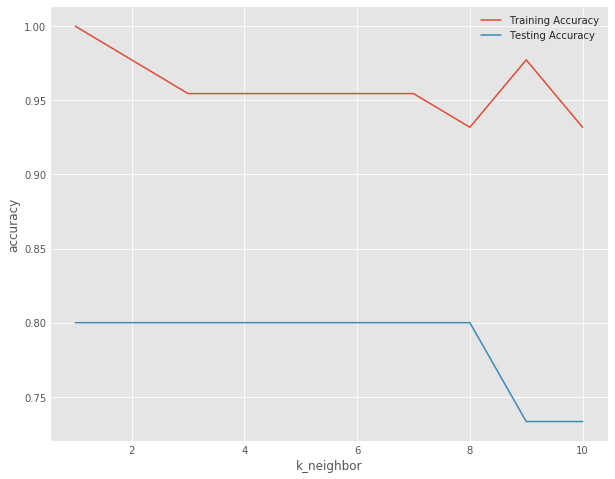

In [89]:
plt.figure(figsize = (10, 8))
plt.plot(k_neighbor_setting, training_accuracy, label = "Training Accuracy")
plt.plot(k_neighbor_setting, testing_accuracy, label = "Testing Accuracy")
plt.xlabel("k_neighbor")
plt.ylabel("accuracy")
plt.legend()

In [90]:
scaler = MinMaxScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.fit_transform(test_x)

In [91]:
training_accuracy = []
testing_accuracy = []
k_neighbor_setting = range(1, 11)
print(k_neighbor_setting)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [92]:
for neighbor in k_neighbor_setting:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(train_x_scaled, train_y)
    
    train_acc = knn.score(train_x_scaled, train_y)
    training_accuracy.append(train_acc)
    
    test_acc = knn.score(test_x_scaled, test_y)
    testing_accuracy.append(test_acc)

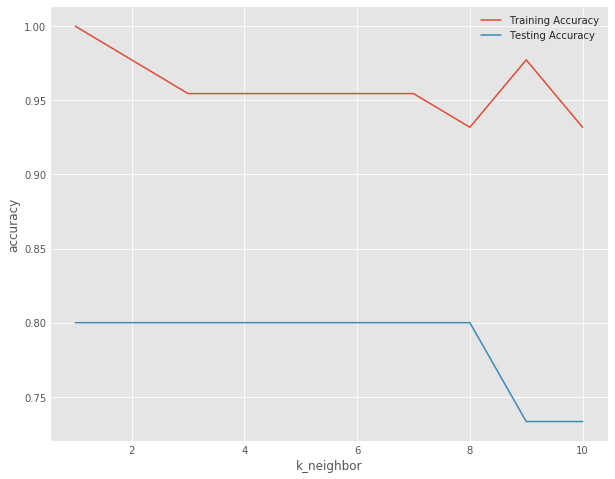

In [93]:
plt.figure(figsize = (10, 8))
plt.plot(k_neighbor_setting, training_accuracy, label = "Training Accuracy")
plt.plot(k_neighbor_setting, testing_accuracy, label = "Testing Accuracy")
plt.xlabel("k_neighbor")
plt.ylabel("accuracy")
plt.legend()

In [94]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_x_scaled, train_y)

train_acc = knn.score(train_x_scaled, train_y)
test_acc = knn.score(test_x_scaled, test_y)

print("Training Accuracy : {0}".format(train_acc))
print("Testing Accuracy : {0}".format(test_acc))

Training Accuracy : 0.954545454545
Testing Accuracy : 0.8


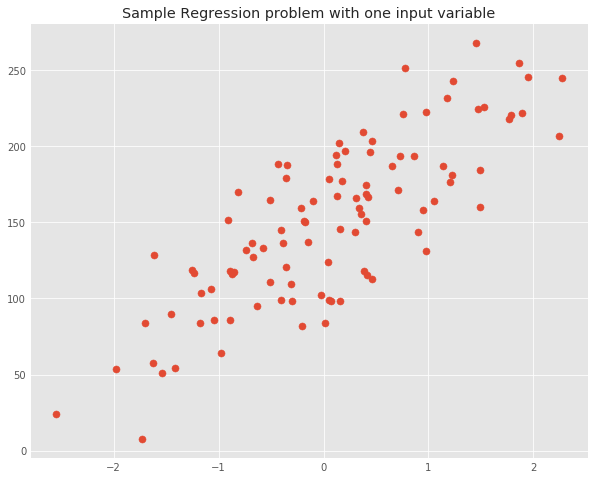

In [104]:
# Simple Regression
make_reg_x, make_reg_y = make_regression(n_samples = 100, n_features = 1, bias = 150.0, noise = 30, random_state = 0)
plt.figure(figsize = (10, 8))
plt.title("Sample Regression problem with one input variable")
plt.scatter(make_reg_x, make_reg_y, marker = "o", s = 50)
plt.show()

In [105]:
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

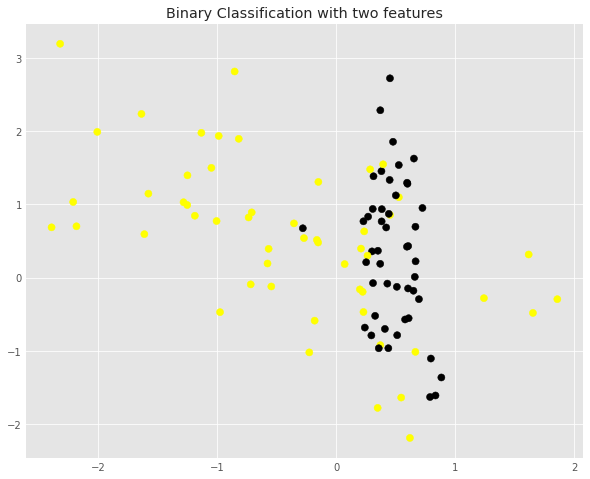

In [114]:
make_class_x, make_class_y = make_classification(
    n_samples = 100, 
    n_features=2,
    n_redundant=0, 
    n_informative=2,
    n_clusters_per_class=1, 
    flip_y = 0.1,
    class_sep = 0.5, 
    random_state=0
)
plt.figure(figsize = (10, 8))
plt.title("Binary Classification with two features")
plt.scatter(make_class_x[:,0], make_class_x[:,1], c = make_class_y, marker = "o", cmap = cmap_bold, s = 50)
plt.show()

In [140]:
def plotTwoClassKNN(train_x, train_y, neighbor, weights, test_x, test_y):
    cmap_light = ListedColormap(['#FFFFAA', '#AAFFAA', '#AAAAFF','#EFEFEF'])
    cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
    
    knn = KNeighborsClassifier(n_neighbors = neighbor, weights = weights)
    knn.fit(train_x, train_y)
    
    x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 1
    y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 1
    
    mesh_step_size = 0.01
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, mesh_step_size),
        np.arange(y_min, y_max, mesh_step_size)
    )
    
    print(xx)
    print(xx.shape)
    print(xx.ravel())
    print(yy.shape)
    print(np.c_[xx.ravel(), yy.ravel()])
    
    z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    
    print(z.shape)
    print(z)
    
    z = z.reshape(xx.shape)
    
    print(z.shape)
    plt.figure(figsize = (12, 10))
    plt.pcolormesh(xx, yy, z, cmap = cmap_light)
    
    plt.scatter(train_x[:, 0], train_x[:, 1], s = 50, c = train_y, cmap = cmap_bold, edgecolors = "black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.title("Plot Two Class KNN")
    
    plt.show()

[[-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
   2.85959455]
 [-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
   2.85959455]
 [-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
   2.85959455]
 ..., 
 [-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
   2.85959455]
 [-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
   2.85959455]
 [-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
   2.85959455]]
(698, 619)
[-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
  2.85959455]
(698, 619)
[[-3.32040545 -2.77928489]
 [-3.31040545 -2.77928489]
 [-3.30040545 -2.77928489]
 ..., 
 [ 2.83959455  4.19071511]
 [ 2.84959455  4.19071511]
 [ 2.85959455  4.19071511]]
(432062,)
[0 0 0 ..., 1 1 1]
(698, 619)


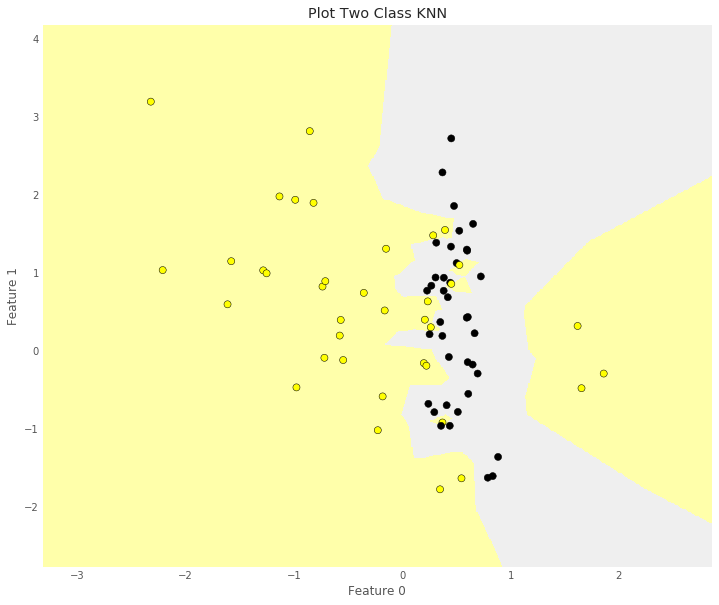

In [141]:
train_x, test_x, train_y, test_y = train_test_split(make_class_x, make_class_y, random_state=0)

plotTwoClassKNN(train_x, train_y, 1, 'uniform', test_x, test_y)

[[-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
   2.85959455]
 [-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
   2.85959455]
 [-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
   2.85959455]
 ..., 
 [-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
   2.85959455]
 [-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
   2.85959455]
 [-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
   2.85959455]]
(698, 619)
[-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
  2.85959455]
(698, 619)
[[-3.32040545 -2.77928489]
 [-3.31040545 -2.77928489]
 [-3.30040545 -2.77928489]
 ..., 
 [ 2.83959455  4.19071511]
 [ 2.84959455  4.19071511]
 [ 2.85959455  4.19071511]]
(432062,)
[0 0 0 ..., 1 1 1]
(698, 619)


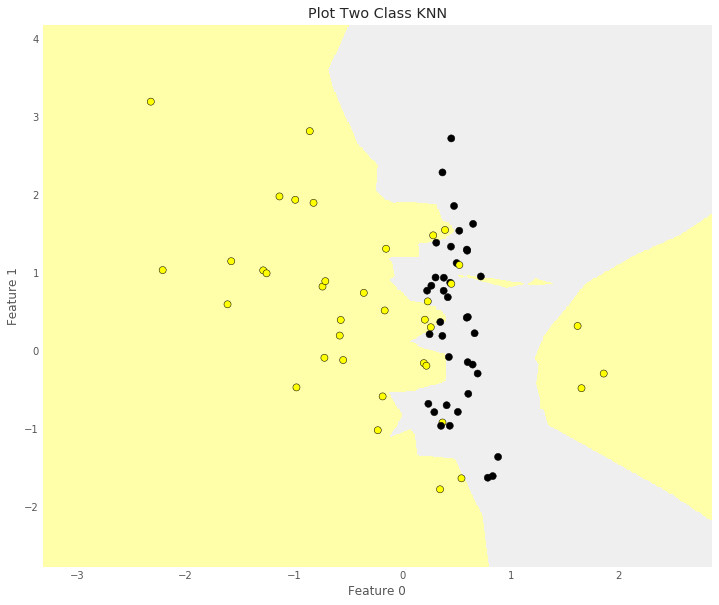

In [142]:
plotTwoClassKNN(train_x, train_y, 3, 'uniform', test_x, test_y)

[[-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
   2.85959455]
 [-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
   2.85959455]
 [-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
   2.85959455]
 ..., 
 [-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
   2.85959455]
 [-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
   2.85959455]
 [-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
   2.85959455]]
(698, 619)
[-3.32040545 -3.31040545 -3.30040545 ...,  2.83959455  2.84959455
  2.85959455]
(698, 619)
[[-3.32040545 -2.77928489]
 [-3.31040545 -2.77928489]
 [-3.30040545 -2.77928489]
 ..., 
 [ 2.83959455  4.19071511]
 [ 2.84959455  4.19071511]
 [ 2.85959455  4.19071511]]
(432062,)
[0 0 0 ..., 1 1 1]
(698, 619)


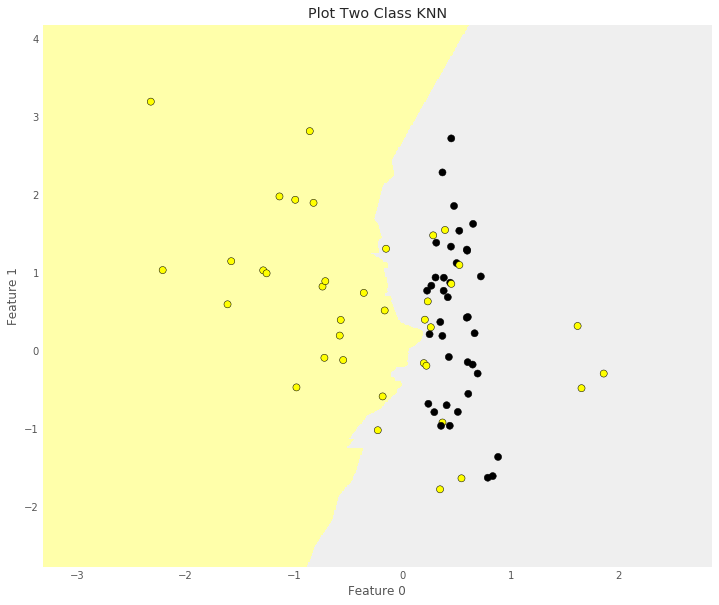

In [143]:
plotTwoClassKNN(train_x, train_y, 11, 'uniform', test_x, test_y)